This script shows how SVM behaves with various values of
𝐶
C on exactly the same dataset, so you can see how margin width and misclassifications are affected.

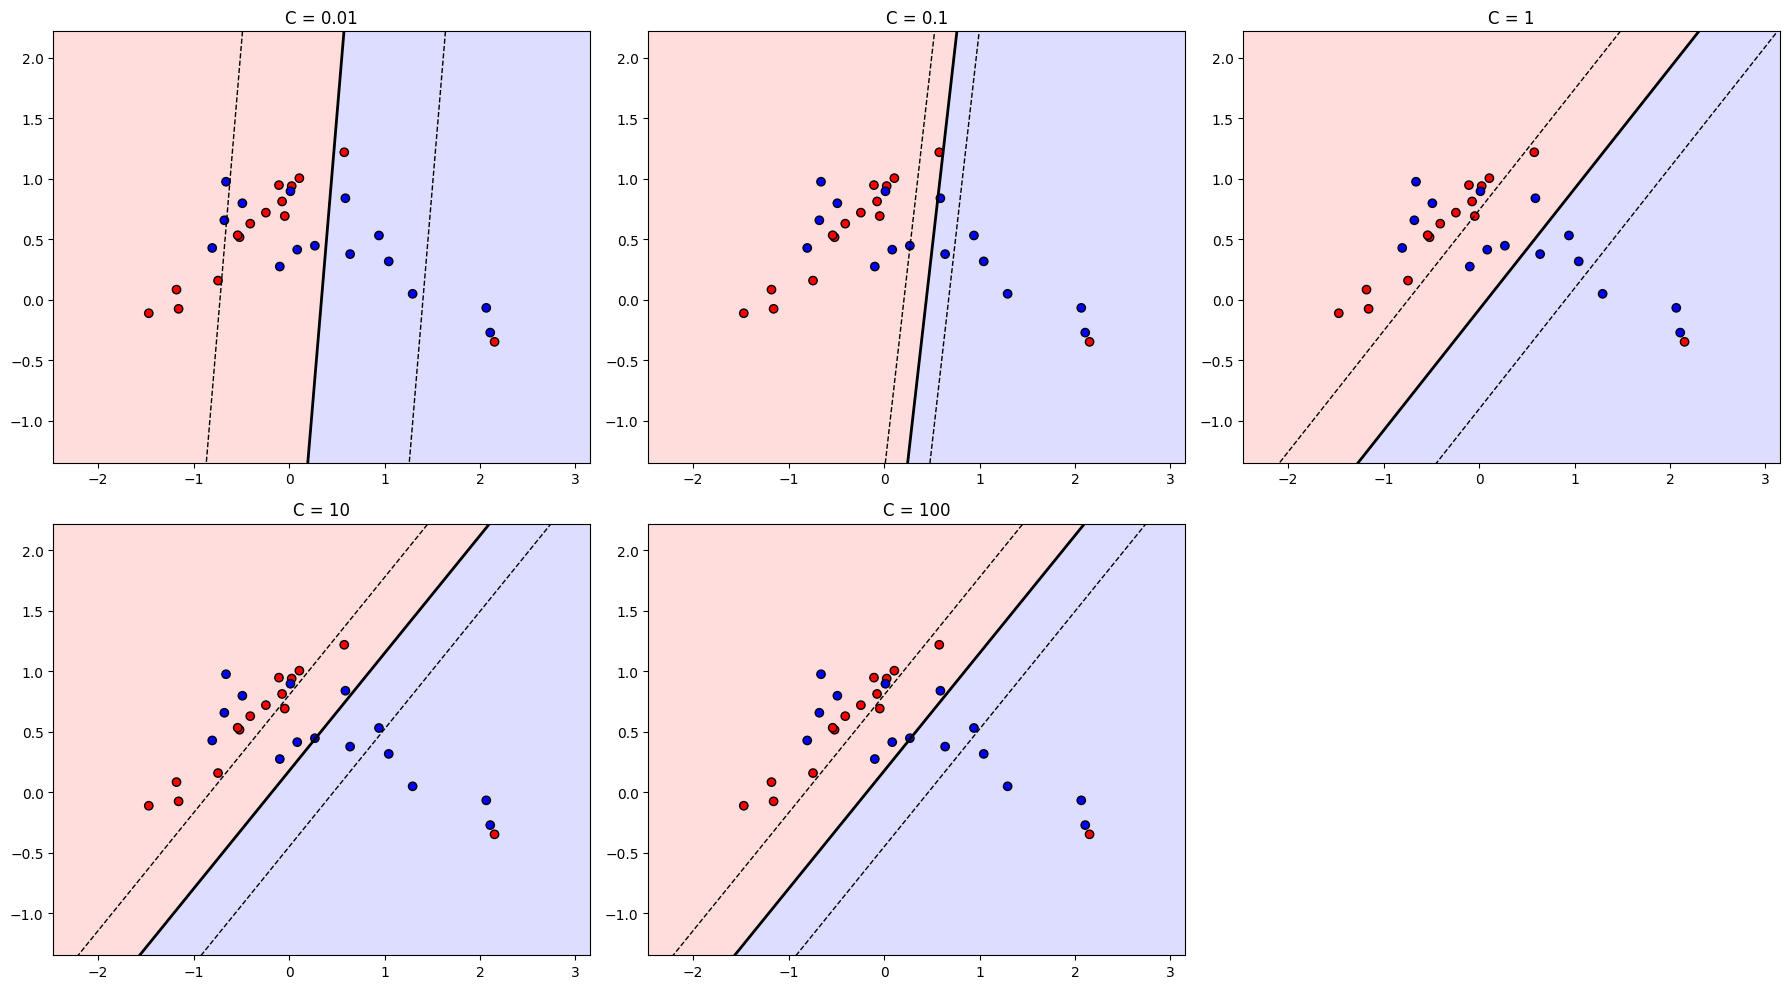

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap

# Generate noisy (less separable) dataset
X, y = make_classification(n_samples=30, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1,
                           class_sep=0.5, flip_y=0.1, random_state=42)

# Define plotting function
def plot_svm_margins(X, y, C_values):
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    cmap = ListedColormap(['#FFAAAA', '#AAAAFF'])

    for i, C in enumerate(C_values):
        model = SVC(kernel='linear', C=C)
        model.fit(X, y)

        ax = axes[i]
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                             np.linspace(y_min, y_max, 500))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

        ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.4)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['red', 'blue']), edgecolors='k')

        w = model.coef_[0]
        b = model.intercept_[0]
        x_vals = np.linspace(x_min, x_max, 200)
        decision = -(w[0]*x_vals + b) / w[1]
        margin = 1 / np.sqrt(np.sum(w ** 2))

        ax.plot(x_vals, decision, 'k-', lw=2)
        ax.plot(x_vals, decision + margin, 'k--', lw=1)
        ax.plot(x_vals, decision - margin, 'k--', lw=1)

        ax.set_title(f'C = {C}')
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Execute with a range of C values
plot_svm_margins(X, y, C_values=[0.01, 0.1, 1, 10, 100])
